# Segundo Avance - PIA

<b>Equipo: </b> 1 <br> 
<b>Grupo: </b> 002, Miércoles 18:00-21:00 <br> 
<b>Integrantes: </b> 
 
- 1794656 Félix Barreras Jesús Guillermo
- 1723237 Linares Núñez Vanessa Stefanía
- 1749744 Ramirez Vargas Dayan
- 1803744 Rodríguez Estrada Erick Alejandro

### Título de la Base de Datos 

[“World Happiness Report”](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv)


### Descripción de los Datos

El World Happiness 2019, que clasifica a 156 países por sus niveles de felicidad, fue lanzado por la Organización de las Naciones Unidas en un evento que celebra el Día Internacional de la Felicidad el 20 de marzo. Las puntuaciones y las clasificaciones de felicidad utilizan datos de la Encuesta Mundial de Gallup. Los puntajes se basan en las respuestas a la pregunta principal de evaluación de la vida que se hizo en la encuesta. Esta pregunta, conocida como la escalera de Cantril, pide a los encuestados que piensen en una escalera en la que la mejor vida posible para ellos sea un 10 y la peor vida posible sea un 0 y que califiquen sus propias vidas actuales en esa escala. Las puntuaciones provienen de muestras representativas a nivel nacional para los años 2013-2016 y utilizan las ponderaciones de Gallup para que las estimaciones sean representativas. 

Las columnas que siguen al puntaje de felicidad estiman en qué medida cada uno de los seis factores (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) contribuyen a hacer que las evaluaciones de vida sean más altas en cada país.

A continuación se muestra el tipo de dato correspondiente a cada columna, así como las dimensiones de la base de datos. 


In [5]:
print("Columna                 Tipo de Dato")
df.dtypes 

Columna                 Tipo de Dato


Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [6]:
print("Número de filas:", df.shape[0], "\nNúmero de columnas:", df.shape[1])

Número de filas: 156 
Número de columnas: 9


### Justificación del Uso de Datos

Los datos presentan, como característica más importante para el equipo, ser internacionales, pues se incluyen 156 países. Es una base de datos lanzada por la Organización de las Naciones Unidas y tiene utilidad en una gran variedad de campos como lo son la economía, la psicología, la salud, entre muchas otras más. 

Los beneficios de trabajar con esta base de datos es que ésta cuenta con una gran variedad de datos numéricos, por lo que creemos que da oportunidad a ser analizada y trabajada con bastante libertad, así como dar respuesta a múltiples preguntas, según sea el caso. Además el hecho de contener a una gran cantidad de países hace que cualquier proyecto que resulte de ella sea de interés internacional. 

### Objetivos

 Objetivo principal: 
 - Identificar los factores que más influyen en la puntuación de la felicidad   
 
Objetivos secundarios:
    
 - Comparar las puntuaciones de felicidad 
 - Identificar a los países con la población más feliz
 - Identificar a los países con la población menos feliz
 - Aportar sugerencias para ser más feliz (acciones individuales) 
 - Aportar sugerencias de mejora o de implementación a los gobiernos para incrementar los niveles de felcidad de 
     sus respectivas poblaciones


### Preguntas de Interés

a)¿Cuáles son aquellos factores que verdaderamente contribuyen a la felicidad?

b)¿Qué acciones puede ejercer un gobierno para tener una población más feliz?

c)¿A qué otros factores contribuye ser feliz?

d)¿Qué países son los más felices y cuáles los menos felices?

e)¿En qué rango de puntuación se encuentra la mayoría de los países?


### Preparación de Datos

In [3]:
#Importación de librerías

#Librerías para visualización
import pandas as pd
import numpy as np
import json

#Librerías para estadística
import plotly as plot
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


#Librerías para gráficas
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [4]:
#Importación base de datos
df = pd.read_csv("uncleandata_happiness_2019.csv")

#NOTA: Recordar que para que el archivo csv pueda ser leído apropiadamente se debe de encontrar
#      en la misma carpeta(direccion) que nuestro archivo de python

### Visualización de los Datos

A continuación se muestra la base de datos original, es decir sin manipulación

In [96]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Los nombres de las columnas se encuentran en inglés y para facilitar la extracción de la información así como un mejor entendimiento se decidió traducirlos al español

In [8]:
df.columns=['Clasificación_General','País_o_Región', 'Puntuación','PIB_per_Cápita', 'Apoyo_Social','Esperanza_de_Vida','Libertad','Generosidad','Ausencia_de_Corrupción']


### Descripción Básica de las Columnas

In [9]:
df

,Clasificación_General,País_o_Región,Puntuación,PIB_per_Cápita,Apoyo_Social,Esperanza_de_Vida,Libertad,Generosidad,Ausencia_de_Corrupción
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<b>Descripción: </b> 

1. Clasificación General:

La columna de clasificación general indica el ranking de cada país, siendo el número 1 el más feliz de la muestra y el 156 el menos. Es de caracter númerico y va de 1 al 156 sin repetir. 

2. País o región:

La columna de país o región indica el nombre del país que esta siendo evaluado en el idioma inglés.

3. Puntuación:

La suma de todos los factores siguientes da como resultado el puntaje de felicidad, que es el que se contiene en la columna de puntuación. Son número flotantes que van del 2.853 al 7.769.

4. PIB per cápita, Apoyo Social, Esperanza de vida, Libertad, Generocidad, Percepcion de corrupción:

Para explicar estas columnas primero es importante definir la distopía. 

>La distopía es un país imaginario que tiene a las personas menos felices del mundo. El propósito de establecer Distopía es tener un punto de referencia con el cual todos los países puedan ser comparados favorablemente (ningún país se desempeña peor que Distopía) en términos de cada una de las seis variables clave, permitiendo así que cada sub-barra tenga un ancho positivo. Las puntuaciones más bajas observadas para las seis variables clave, por lo tanto, caracterizan a la distopía. Dado que la vida sería muy desagradable en un país con los ingresos más bajos del mundo, la menor esperanza de vida, la menor generosidad, la mayor parte de la corrupción, la menor libertad y el menor apoyo social, se lo conoce como "distopía", en contraste con la utopía.

Ahora bien, las columnas: PIB per cápita, Apoyo Social, Esperanza de vida, Libertad, Generosidad y Percepción de Corrupción describen en qué medida estos factores contribuyen a evaluar la felicidad en cada país tomando como punto de comparación los valores otorgados a Distopía. 

### Primera limpieza de datos

Dado que el objetivo de nuestro trabajo es analizar cuales son aquellos factores que influyen en la felicidad de las personas, hemos decidido que no es necesario eliminar ninguna columna debido a que cada columna representa los diversos factores que analizaremos. Así mismo no existen datos nulos, por lo que se conserva la base de datos completa.

### Estadística Básica de los Datos

In [85]:
df

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Clasificación_General,País_o_Región,Puntuación,PIB_per_Cápita,Apoyo_Social,Esperanza_de_Vida,Libertad,Generosidad,Ausencia_de_Corrupción
0,0,0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,152,152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,153,153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,154,154,154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<b>Valor mínimo y máximo en puntuación </b>  

Con las funciones max y min podemos obtener el mayor puntaje obtenido, así como el menor.

In [101]:
df['Puntuación'].min()

2.853

In [102]:
df['Puntuación'].max()

7.769

Como podemos ver el menor puntaje obtenido es de 2.853 y el mayor puntaje obtenido es de 7.769, hay una diferencia bastante grande entre estos dos puntajes. También se puede destacar que el mayor puntaje no se acerca realmente al 10 (que sería el mayor puntaje posible de obtener), lo cual podría ser preocupante ya que no hay un país al cual se le pueda considerar como un país excelente en su nivel de felicidad.

#### Puntuación promedio

A partir de la función mean podemos saber cual es el promedio de la puntuación obtenida en los 156 países de nuestra base de datos.

In [104]:
df['Puntuación'].mean()

5.407096153846153

El promedio de la Puntuación es de 5.407.

Considerando que la puntuación va desde el 0 (siendo este el valor más bajo que se podría obtener) hasta el 10 (siendo este el valor más alto que se podría obtener), es relamente preocupante que el promedio de felicidad en estos 156 países del mundo sea un punto tan neutro. Se podría decir que, en promedio, los países en el mundo no son tan felices pero tampoco son tan infelices.

#### Correlación 
Debido a que nuestro objetivo principal es encontrar la respuesta a la pregunta: ¿cuáles son aquellos factores que verdaderamente contribuyen a la felicidad?, uno de los estadísticos que nos puede ayudar a dar respuesta es la correlacion y la covarianza entre los factores que se estan analizando (PIB per cápita, Apoyo social, Esperanza de vida, Libertad, Generosidad, Ausencia de corrupción) con la puntuación que reciben los países.

In [10]:
mat_corr=df.corr()
mat_corr

,Clasificación_General,Puntuación,PIB_per_Cápita,Apoyo_Social,Esperanza_de_Vida,Libertad,Generosidad,Ausencia_de_Corrupción
Clasificación_General,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Puntuación,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
PIB_per_Cápita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Apoyo_Social,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Esperanza_de_Vida,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Libertad,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosidad,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Ausencia_de_Corrupción,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Al analizar la matriz de correlación nos enfocaremos en la columna(o fila) de "Puntuación", ya que nos interesa saber que factores estan mas correlacionados a la puntuación. Se podría decir que el <b>PIB per cápita</b>, el <b>Apoyo Social</b> y la <b>Esperanza de vida</b> estan fuertemente correlacionados con la Puntuación. El factor menos correlacionado con la Puntuación es la Generocidad.

### Gráficas

#### Heat map 

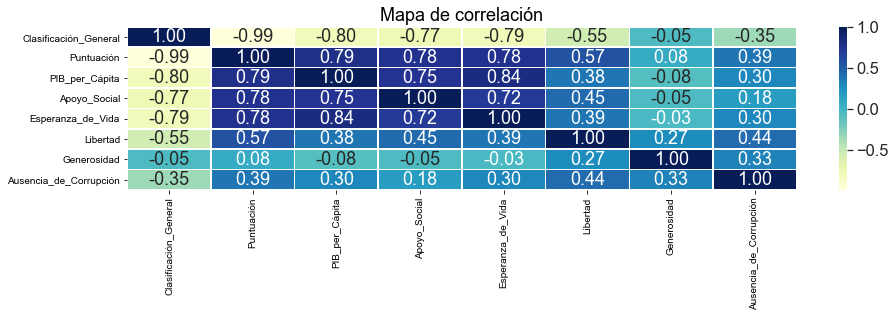

In [11]:
f,ax=plt.subplots(figsize = (15,3))
sns.set(font_scale=1.5)
sns.heatmap(mat_corr,annot= True,linewidths=0.5,fmt = ".2f",cmap="YlGnBu",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Gracias a esta gráfica de heatmap podemos ver de una forma mas atractiva y sencilla el nivel en que cada uno de los factores está correlacionado con la puntuación que cada país recibe

#### Boxplot

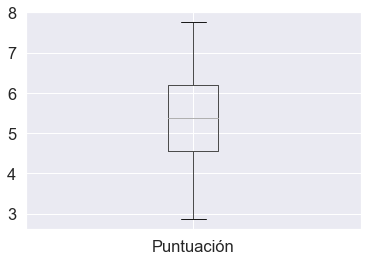

In [139]:
boxplot= df.boxplot(column='Puntuación')

De este gráfico podemos observar la dispersión de los datos e identificar la mediana. Así como afirmar que la mayorpia de los países se encuentra alrededor de la mediana. 

#### Choropleth Map

In [12]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df['País_o_Región'],
        locationmode = "country names",
        z = df['Puntuación'],
        text = df['País_o_Región'],
        colorbar = {'title' : 'Nivel de felicidad'},
        
      )
layout = dict(title = 'Mapa de felicidad',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )

In [13]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Esta grafica nos sirve para ver de manera mas visual e interactiva cuáles son los países en el mundo con mayor, o menor felicidad. Mientras más azul/morado menos infeliz, y mientras mas verde/amarillo más feliz. A la vez nos permite, al poner nuestro cursor en el país deseado, ver su puntuación específica.

#### Top 10 países más felices

In [124]:
happy_top10 = df.groupby('País_o_Región')['Puntuación'].max().sort_values(ascending=False).head(10).reset_index()
happy_top10.columns = ['País_o_Región','Puntuación']
happy_top10

,País_o_Región,Puntuación
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
5,Switzerland,7.480
6,Sweden,7.343
7,New Zealand,7.307
8,Canada,7.278
9,Austria,7.246


(0.0, 10.0)

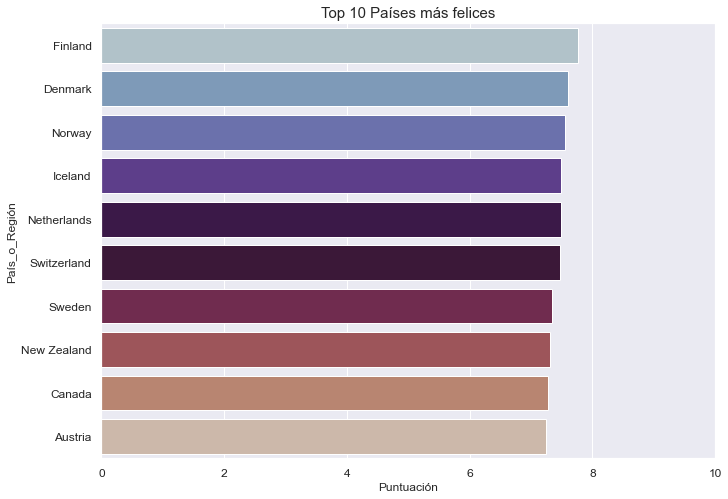

In [126]:
plt.figure(figsize=(11,8))
sns.barplot(y=happy_top10['País_o_Región'], x=happy_top10['Puntuación'], palette='twilight', orient='h')
plt.title('Top 10 Países más felices', fontsize=15)
plt.xlabel('Puntuación', fontsize=12)
plt.ylabel('País_o_Región', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)

Como podemos ver en este top 10 de países más felices, todos los países dentro de él son países primer mundistas. Lo cual afirma que el PIB influye de manera directa en la felicidad de los países.

#### Top 10 países menos felices

In [127]:
sad_top10 = df.groupby('País_o_Región')['Puntuación'].max().sort_values(ascending=False).tail(10).reset_index()
sad_top10.columns = ['País_o_Región','Puntuación']

In [128]:
sad_top10.sort_values(by=['Puntuación'],inplace=True, ascending=True)
sad_top10

,País_o_Región,Puntuación
9,South Sudan,2.853
8,Central African Republic,3.083
7,Afghanistan,3.203
6,Tanzania,3.231
5,Rwanda,3.334
4,Yemen,3.380
3,Malawi,3.410
2,Syria,3.462
1,Botswana,3.488
0,Haiti,3.597


(0.0, 10.0)

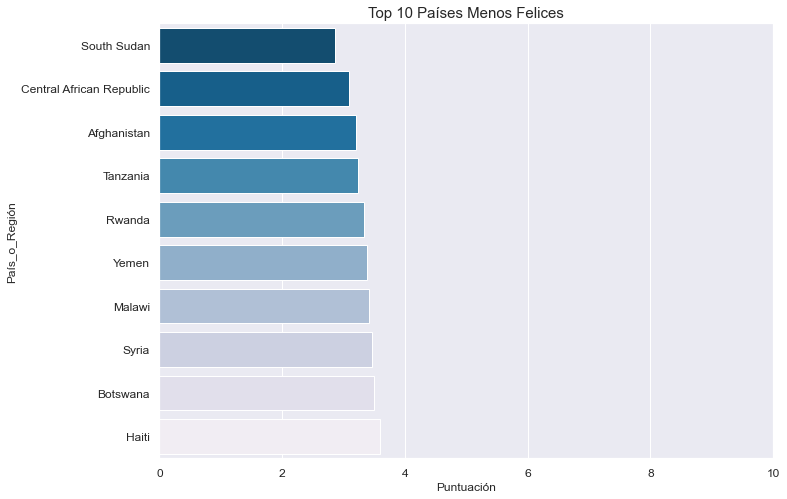

In [129]:
plt.figure(figsize=(11,8))
sns.barplot(y=sad_top10['País_o_Región'], x=sad_top10['Puntuación'], palette='PuBu_r', orient='h')
plt.title('Top 10 Países Menos Felices', fontsize=15)
plt.xlabel('Puntuación', fontsize=12)
plt.ylabel('País_o_Región', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)

Como podemos ver en este top 10 de países menos felices, todos los países dentro de él son países tercer mundistas. Debido a que uno de nuestros objetivos secundarios es poder establecer qué acciones puede ejercer un gobierno para tener una población más feliz, analizaremos a más profundida al top 10 de países menos felices, para ver si los factores que influyen más en la felicidad de éstos son los mismos que influyen en el top 10 de países más felices.

#### Análisis del top 10 países menos felices

In [130]:
top10_sad=df.iloc[146:]
top10_sad=top10_sad.drop(top10_sad.columns[0], axis='columns')
top10_sad

,País_o_Región,Puntuación,PIB_per_Cápita,Apoyo_Social,Esperanza_de_Vida,Libertad,Generosidad,Ausencia_de_Corrupción
146,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [131]:
top10sad_corr=top10_sad.corr()
top10sad_corr

,Puntuación,PIB_per_Cápita,Apoyo_Social,Esperanza_de_Vida,Libertad,Generosidad,Ausencia_de_Corrupción
Puntuación,1.000000,0.411473,0.384953,0.626671,0.191930,0.175229,0.179491
PIB_per_Cápita,0.411473,1.000000,0.565681,0.530665,0.207314,-0.363444,0.124056
Apoyo_Social,0.384953,0.565681,1.000000,0.714243,0.309085,-0.470983,0.171790
Esperanza_de_Vida,0.626671,0.530665,0.714243,1.000000,0.526710,-0.104546,0.628965
Libertad,0.191930,0.207314,0.309085,0.526710,1.000000,-0.327657,0.551589
Generosidad,0.175229,-0.363444,-0.470983,-0.104546,-0.327657,1.000000,0.138072
Ausencia_de_Corrupción,0.179491,0.124056,0.171790,0.628965,0.551589,0.138072,1.000000


In [133]:
top10sad_corr=top10sad_corr.drop(['PIB_per_Cápita'], axis=0)
top10sad_corr=top10sad_corr.drop(['Apoyo_Social'], axis=0)
top10sad_corr=top10sad_corr.drop(['Esperanza_de_Vida'], axis=0)
top10sad_corr=top10sad_corr.drop(['Generosidad'], axis=0)
top10sad_corr=top10sad_corr.drop(['Libertad'], axis=0)
top10sad_corr=top10sad_corr.drop(['Ausencia_de_Corrupción'], axis=0)
top10sad_corr

,Puntuación,PIB_per_Cápita,Apoyo_Social,Esperanza_de_Vida,Libertad,Generosidad,Ausencia_de_Corrupción
Puntuación,1.0,0.411473,0.384953,0.626671,0.19193,0.175229,0.179491


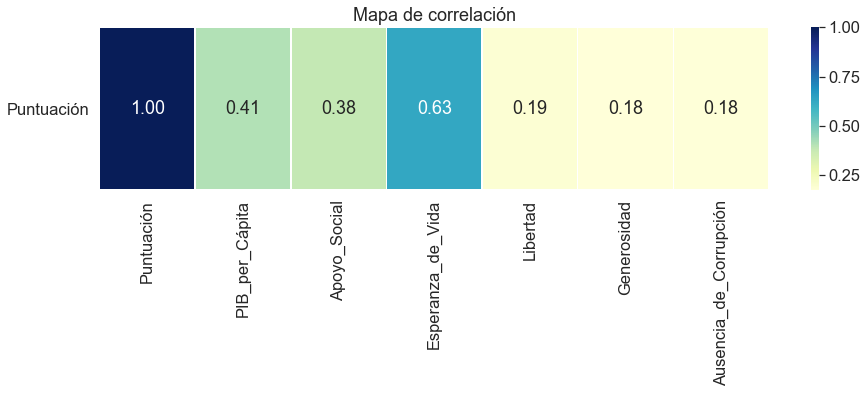

In [134]:
f,ax=plt.subplots(figsize = (15,3))
sns.set(font_scale=1.5)
sns.heatmap(top10sad_corr,annot= True,linewidths=0.5,fmt = ".2f",cmap="YlGnBu",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

De este gráfico podemos concluir que a diferencia del análisis general los países menos felices, al ser tercer mundistas con estructuras econónmicas inestables, no se ven mayormente influidos en su puntuación de felicidad  por el PIB. Y al identificar qué factor tiene más influencia y cuales menos, se pueden aportar sugerencias más factibles a la sociedad y gobierno para incrementar los niveles de felicidad. 